<h1>Pokemon Tier Classifier</h1>
<h3>The purpose of this document is to figure the best way to classifiy a pokemon's tier</h3>


<br>
<h2>The Data Set</h2>
<p>The information in this dataset is scraped from <a href="https://bulbapedia.bulbagarden.net/wiki/Main_Page">Bulbapedia</a> and <a href="https://www.smogon.com/">Smogon University</a>. It contains a pokemon's stats and scoring based off typing. Since, Smogon has different values each generation, every record has a Gen# the info is pulled from, and its name for quick refenernce.  Lastly, the tier the pokemon is classified contained in here as well.</p>
<p>Here's a little more on what the O-Score and D-Score represent. Well the O-score represents offensive typing, and the D-Score represents defensive. These values are determined by how effective a move is against other types and how effective other types are against it respectively. So, it's good to have a high O-Score, but D-Score is better if it is lower.</p>
<h3> Attack Example: </h3>
    <p>Note the follwing table</p>
    <p>Attacking Type: <em>Water</em></p>
    <table>
    <thead>
        <th>normal</th>
        <th>fighting</th>
        <th>flying</th>
        <th>poison</th>
        <th>ground</th>
        <th>rock</th>
        <th>bug</th>
        <th>ghost</th>
        <th>steel</th>
        <th>fire</th>
        <th>water</th>
        <th>grass</th>
        <th>electric</th>
        <th>psychic</th>
        <th>ice</th>
        <th>dragon</th>
        <th>dark</th>
        <th>fairy</th>
        <th>Total</th>
    </thead>
    <tbody>
        <td>1x</td> <!-- Normal -->       
        <td>1x</td> <!-- Fighting -->     
        <td>1x</td> <!-- Flying -->       
        <td>1x</td> <!-- Poison -->       
        <td>2x</td> <!-- Ground -->       
        <td>2x</td> <!-- Rock -->        
        <td>1x</td> <!-- Bug -->   
        <td>1x</td> <!-- Ghost -->   
        <td>1x</td> <!-- Steel -->   
        <td>2x</td> <!-- Fire -->   
        <td>0.5x</td> <!-- Water -->   
        <td>0.5x</td> <!-- Grass -->   
        <td>1x</td> <!-- Electric -->   
        <td>1x</td> <!-- Psychic -->   
        <td>1x</td> <!-- Ice -->   
        <td>0.5x</td> <!-- Dragon -->   
        <td>1x</td> <!-- Dark -->   
        <td>1x</td> <!-- Fairy -->   
        <td>19.5</td>
    </tbody>
    </table>
    <h3>Defense Exampe:</h3>
    <p>Note the follwing table</p>
    <p>Defending Type: <em>Rock</em></p>
        <table>
    <thead>
        <th>normal</th>
        <th>fighting</th>
        <th>flying</th>
        <th>poison</th>
        <th>ground</th>
        <th>rock</th>
        <th>bug</th>
        <th>ghost</th>
        <th>steel</th>
        <th>fire</th>
        <th>water</th>
        <th>grass</th>
        <th>electric</th>
        <th>psychic</th>
        <th>ice</th>
        <th>dragon</th>
        <th>dark</th>
        <th>fairy</th>
        <th>Total</th>
    </thead>
    <tbody>
        <td>0.5x</td> <!-- Normal -->       
        <td>2X</td> <!-- Fighting -->   
        <td>0.5x</td> <!-- Flying -->   
        <td>0.5x</td> <!-- Poison -->   
        <td>2x</td> <!-- Ground -->   
        <td>1x</td> <!-- Rock -->   
        <td>0.5x</td> <!-- Bug -->   
        <td>1x</td> <!-- Ghost -->   
        <td>2x</td> <!-- Steel -->   
        <td>0.5x</td> <!-- Fire -->   
        <td>2x</td> <!-- Water -->   
        <td>2x</td> <!-- Grass -->   
        <td>1x</td> <!-- Electric -->   
        <td>1x</td> <!-- Psychic -->   
        <td>1x</td> <!-- Ice -->   
        <td>1x</td> <!-- Dragon -->   
        <td>1x</td> <!-- Dark -->   
        <td>1x</td> <!-- Fairy -->   
        <td>21</td>
    </tbody>
    </table>
<h2>Duel Types</h2>
<p> So what happens when there are duel types? O-Scores and D-Scores handle this problem slightly differently. Since a pokemon move only has 1 type when it attacks, when calculating a O-Score it takes account the higher type that would do more damage to the opposing type. D-Scores have the values multiplied together, so a pokemon that is Rock and Ground types would have a 4x weakness to water. So the values in the list get multiplied together.</p>
<p><em><strong>Note: </strong>Even though flying press is a dule type move, it does not have any combinations that would be 4x weak to it, and it's just one move so it is not accounting for something like that</em></p>

In [1]:
import process_data 
import pandas as pd 
import matplotlib.pyplot as plt 

#import pokemon tier data that has been scraped from smogon
dataset = process_data.create_bulk_data_set()
print(dataset.shape)
print(dataset.columns)

(4330, 16)
Index(['Gen#', 'Name', 'Type1', 'Type2', 'Ability1', 'Ability2', 'Ability3',
       'Tier', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'O-Score', 'D-Score'],
      dtype='object')


In [2]:
# Remove columns that are not going to be used in the tier classifier
ds = dataset[["Gen#", "Name", "Tier", 
                      "HP", "Attack", "Defense", 
                      "Sp. Atk", "Sp. Def", "Speed",
                      "O-Score", "D-Score"]].copy()
ds.tail()

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score
4325,8,Zoroark,NU,60,105,60,120,60,105,18.5,19.00
4326,8,Zorua,LC,40,65,40,80,40,65,18.5,19.00
4327,8,Zubat,LC,40,45,35,30,40,55,21.0,17.75
4328,8,Zweilous,NFE,72,85,70,65,70,58,20.5,21.00
4329,8,Zygarde,Uber,108,100,121,81,95,95,24.0,20.50


<h2>Number of Pokemon in each Tier</h2>
<p>We want to look at this and check to see how the tiers are distributed. From this we can see that the Little Cup(LC) tier has the majority of pokemon in it. This makes sense since the rules state that the pokemon has to be Not Fully Evovled(NFE) and obtainable at level 5 in the game. The NFE has quite a few pokemon as well, it's just not as popular a format, so there are not as many entries. There is National Dex tier from Sword and Sheild, which means that the pokemon was not implemented, and is unobtainable in the game. Untiered, means a pokemon has yet to be used in a format, so there is no tier information on it. There is a Blank Tier from an error in gathering the data, data isn't always perfect. Lastly, there is the Anthing Goes (AG), and that is just for Mega Rayquaza</p>

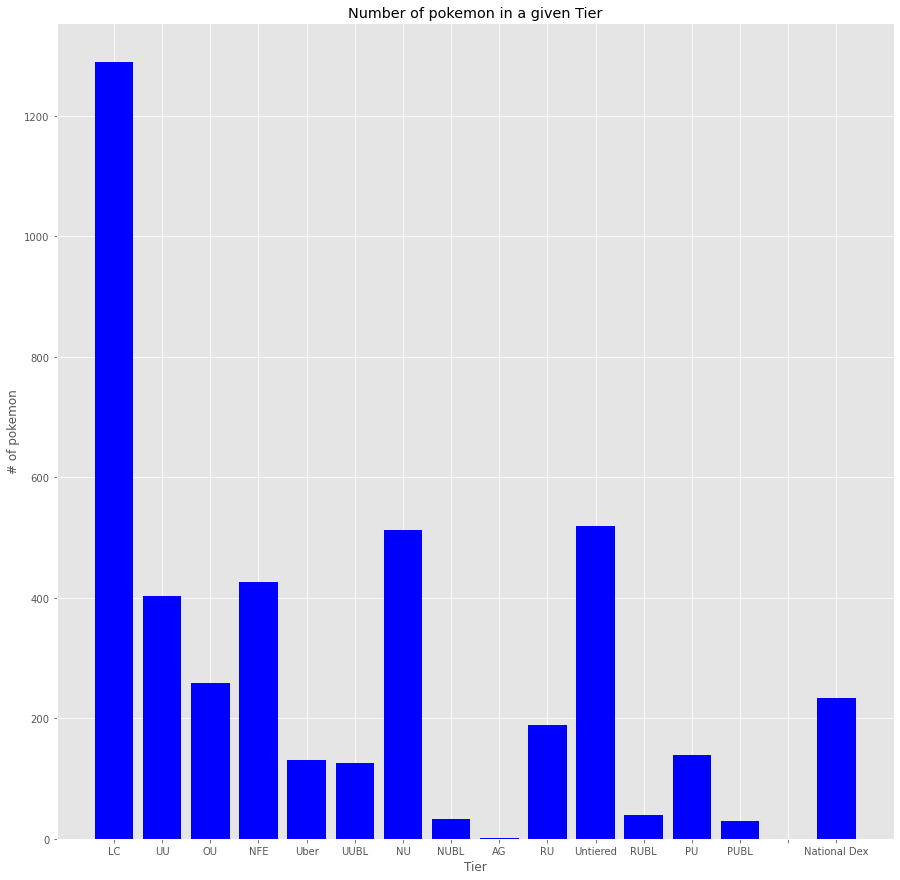

In [3]:
def display_tier_counts(data):
    """generates a bar chart for displaying the number of pokemon in a tier"""
    counts = {}
    for tier in data.Tier.unique():
        filtered = data[data["Tier"]==tier]
        counts[tier] = len(filtered)
    counts

    %matplotlib inline
    plt.style.use("ggplot")

    x = list(counts.keys())
    y = list(counts.values())
    x_pos = [i for i, _ in enumerate(x)]
    fig, ax = plt.subplots(figsize=(15,15))
    plt.bar(x_pos, y, color="blue")
    plt.xlabel("Tier")
    plt.ylabel("# of pokemon")
    plt.title("Number of pokemon in a given Tier")
    plt.xticks(x_pos, x)
    
display_tier_counts(ds)

In [4]:
ds["Stat Total"] = (ds["HP"] + ds["Attack"] + 
                    ds["Defense"] + ds["Sp. Atk"] + 
                    ds["Sp. Def"] + ds["Speed"])
ds.tail()

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
4325,8,Zoroark,NU,60,105,60,120,60,105,18.5,19.00,510
4326,8,Zorua,LC,40,65,40,80,40,65,18.5,19.00,330
4327,8,Zubat,LC,40,45,35,30,40,55,21.0,17.75,245
4328,8,Zweilous,NFE,72,85,70,65,70,58,20.5,21.00,420
4329,8,Zygarde,Uber,108,100,121,81,95,95,24.0,20.50,600


In [6]:
ds.shape
ds.dropna()
data = ds
data = data.dropna()
print(data.shape)
data  = data[data.Tier.isin(['PU', 'PUBL', 'NU', 'NUBL', 'RU', 'RUBL', 'UU', 'UUBL', 'OU', 'Uber'])]
data.tail()


(3809, 12)


,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
4320,8,Zarude,RU,105,120,105,70,95,105,23.0,23.00,600
4322,8,Zekrom,Uber,100,150,120,120,100,90,21.0,18.75,680
4323,8,Zeraora,UU,88,112,75,102,80,143,17.5,17.50,600
4325,8,Zoroark,NU,60,105,60,120,60,105,18.5,19.00,510
4329,8,Zygarde,Uber,108,100,121,81,95,95,24.0,20.50,600


In [7]:
x= data["Stat Total"]

x

1       500
2       540
3       424
4       535
5       610
       ... 
4320    600
4322    680
4323    600
4325    510
4329    600
Name: Stat Total, Length: 1860, dtype: int64

In [8]:
y= data["Tier"]
y

1         UU
2         OU
3         UU
4         UU
5         UU
        ... 
4320      RU
4322    Uber
4323      UU
4325      NU
4329    Uber
Name: Tier, Length: 1860, dtype: object

Putting figure in 0, 0
Putting figure in 0, 1
Putting figure in 0, 0
Putting figure in 0, 1
Putting figure in 1, 0
Putting figure in 1, 1
Putting figure in 1, 0
Putting figure in 1, 1
Putting figure in 2, 0


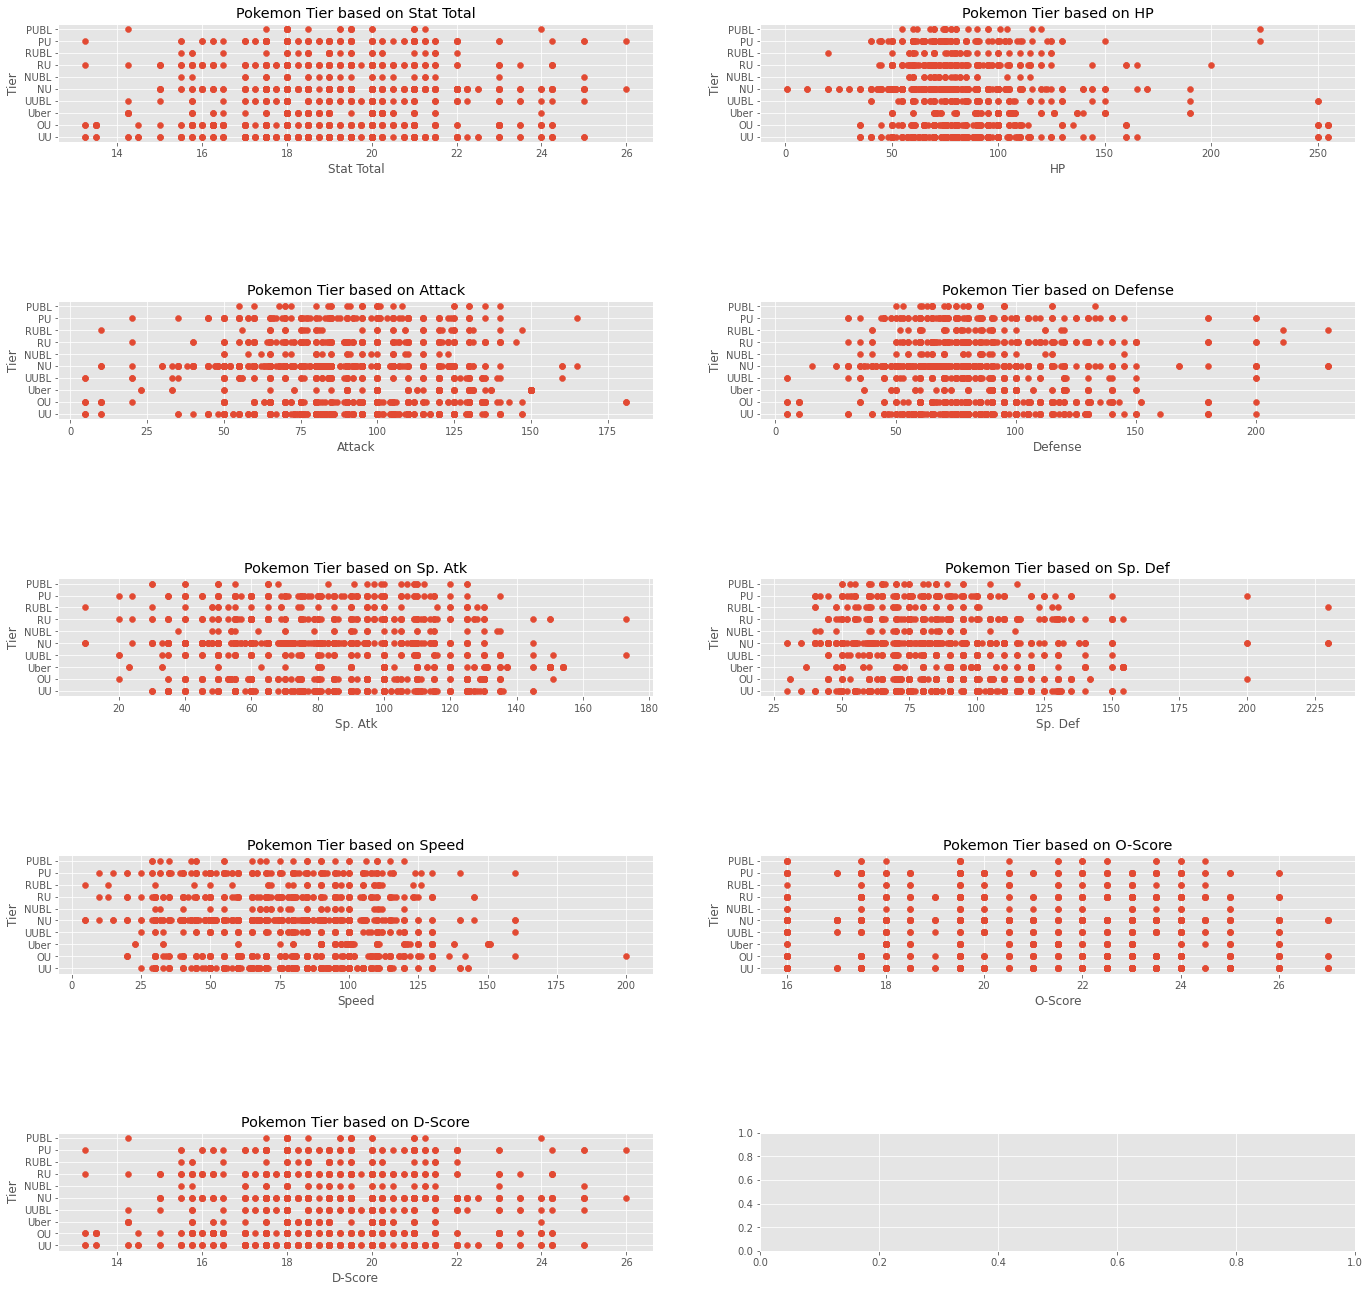

In [29]:


rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols)
fig.tight_layout()
times_run = 0

def create_plot(col_name, x_data, y_data, times_run):
    posX = times_run // cols
    posY = times_run % cols
    print(f"Putting figure in {posX//cols}, {posY}")
    axs[posX][posY].scatter(x_data, y_data)
    axs[posX][posY].set_xlabel(col_name)
    axs[posX][posY].set_ylabel("Tier")
    axs[posX][posY].set_title(f"Pokemon Tier based on {col_name}")
    fig.set_figheight(20)
    fig.set_figwidth(20)
  

create_plot("Stat Total", x, y,  times_run)
times_run += 1


x = data["HP"]
y = data["Tier"]

create_plot("HP", x,y, times_run)
times_run += 1


x = data["Attack"]
y = data["Tier"]

create_plot("Attack", x,y, times_run)
times_run += 1


x = data["Defense"]
y = data["Tier"]

create_plot("Defense", x,y, times_run)
times_run += 1


x = data["Sp. Atk"]
y = data["Tier"]

create_plot("Sp. Atk", x,y,  times_run)
times_run += 1



x = data["Sp. Def"]
y = data["Tier"]
create_plot("Sp. Def", x,y, times_run)
times_run += 1


x = data["Speed"]
y = data["Tier"]
create_plot("Speed", x,y,  times_run)
times_run += 1


x = data["O-Score"]
y = data["Tier"]

create_plot("O-Score", x,y,  times_run)
times_run += 1


x = data["D-Score"]
y = data["Tier"]

create_plot("D-Score", x,y,  times_run)
times_run += 1


In [10]:
data

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
1,1,Aerodactyl,UU,80,105,65,60,60,130,23.5,19.50,500
2,1,Alakazam,OU,55,50,45,135,135,120,18.0,20.00,540
3,1,Arbok,UU,60,85,69,65,65,80,17.0,17.50,424
4,1,Arcanine,UU,90,110,80,80,80,95,20.0,18.00,535
5,1,Articuno,UU,90,85,100,125,125,85,23.5,22.00,610
...,...,...,...,...,...,...,...,...,...,...,...,...
4320,8,Zarude,RU,105,120,105,70,95,105,23.0,23.00,600
4322,8,Zekrom,Uber,100,150,120,120,100,90,21.0,18.75,680
4323,8,Zeraora,UU,88,112,75,102,80,143,17.5,17.50,600
4325,8,Zoroark,NU,60,105,60,120,60,105,18.5,19.00,510


In [11]:
data.Tier.unique()

array(['UU', 'OU', 'Uber', 'UUBL', 'NU', 'NUBL', 'RU', 'RUBL', 'PU',
       'PUBL'], dtype=object)

In [12]:
tier_scores = {
    "Uber": 5.0,
    "OU": 4.5 ,
    "UUBL": 4.0,
    "UU": 3.5,
    "RUBL": 3.0,
    "RU": 2.5,
    "NUBL": 2.0,
    "NU":1.5,
    "PUBL":1.0,
    "PU":0.5
}
ordered_tiers = [key for key in tier_scores]
ordered_tiers.reverse()
ordered_tiers

['PU', 'PUBL', 'NU', 'NUBL', 'RU', 'RUBL', 'UU', 'UUBL', 'OU', 'Uber']

In [13]:
zticks = [value for _, value in tier_scores.items()]
zticks.reverse()

In [14]:
scored = [tier_scores[row] for row in data["Tier"]]
data["Tier Score"] = scored
data.tail()

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total,Tier Score
4320,8,Zarude,RU,105,120,105,70,95,105,23.0,23.00,600,2.5
4322,8,Zekrom,Uber,100,150,120,120,100,90,21.0,18.75,680,5.0
4323,8,Zeraora,UU,88,112,75,102,80,143,17.5,17.50,600,3.5
4325,8,Zoroark,NU,60,105,60,120,60,105,18.5,19.00,510,1.5
4329,8,Zygarde,Uber,108,100,121,81,95,95,24.0,20.50,600,5.0


Text(0.5, 0.92, 'Tier based off Type')

<Figure size 432x288 with 0 Axes>

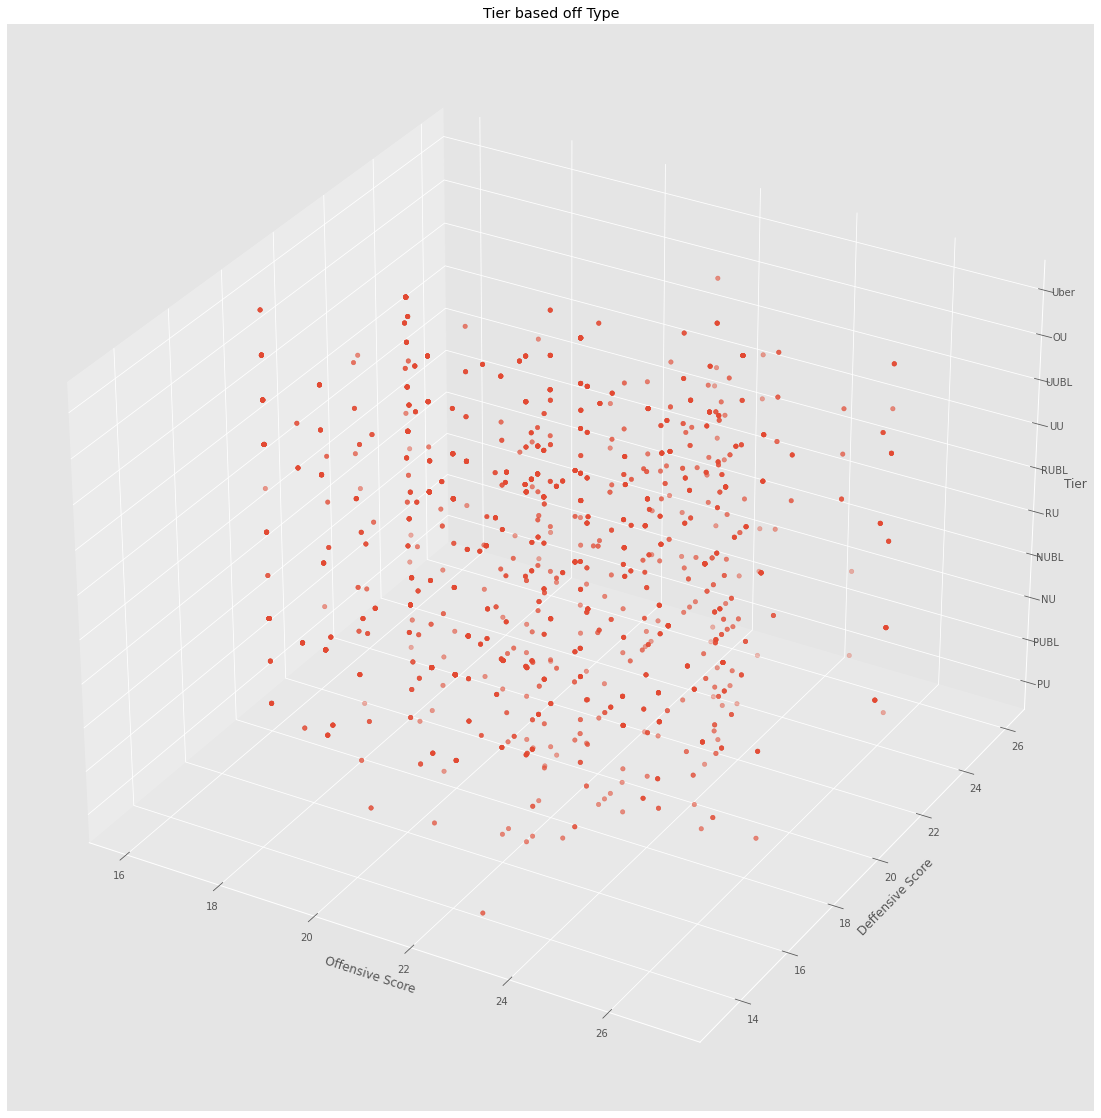

In [15]:
plt.set_cmap("jet")
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["O-Score"], data["D-Score"], data["Tier Score"])
ax.set_xlabel("Offensive Score")
ax.set_ylabel("Deffensive Score")
ax.set_zlabel("Tier")
ax.set_zticks(zticks)
ax.set_zticklabels(ordered_tiers)
ax.set_title("Tier based off Type")

In [16]:
#By default dataframes do not sample with replace
data = data.drop(columns=["Name", "Gen#"])
train_x = data.drop(columns=["Tier"])
train_y = [tier_scores[tier] for tier in data["Tier"]]


In [17]:
train_x = train_x.drop(columns=["Tier Score"])
train_x

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
1,80,105,65,60,60,130,23.5,19.50,500
2,55,50,45,135,135,120,18.0,20.00,540
3,60,85,69,65,65,80,17.0,17.50,424
4,90,110,80,80,80,95,20.0,18.00,535
5,90,85,100,125,125,85,23.5,22.00,610
...,...,...,...,...,...,...,...,...,...
4320,105,120,105,70,95,105,23.0,23.00,600
4322,100,150,120,120,100,90,21.0,18.75,680
4323,88,112,75,102,80,143,17.5,17.50,600
4325,60,105,60,120,60,105,18.5,19.00,510


In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
n_cols = train_x.shape[1]

model.add(Dense(10, activation="relu", input_shape=(n_cols,)))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

In [19]:
import tensorflow as tf

model.compile(optimizer= tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy)

In [20]:
import numpy as np
from keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience=3)

model.fit(np.asarray(train_x), 
          np.asarray(train_y),
          validation_split= 0.2,
          epochs=30,
         callbacks=[stop_early])

Epoch 1/30
47/47 [==============================] - 1s 16ms/step - loss: 3.4400e-07 - val_loss: 3.2622e-07
Epoch 2/30
47/47 [==============================] - 0s 1ms/step - loss: 3.3779e-07 - val_loss: 3.2622e-07
Epoch 3/30
47/47 [==============================] - 0s 1ms/step - loss: 3.3423e-07 - val_loss: 3.2622e-07
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 3.3873e-07 - val_loss: 3.2622e-07


In [21]:
test_x = data.sample(frac=0.2)
test_y = [tier_scores[tier] for tier in test_x["Tier"]]
test_x = test_x.drop(columns=["Tier", "Tier Score"])

In [22]:
score = model.evaluate(np.asarray(test_x),
                       np.asarray(test_y),
                       verbose=0)

In [23]:
print(score)

3.560255947832047e-07


In [24]:
ordered_tiers

['PU', 'PUBL', 'NU', 'NUBL', 'RU', 'RUBL', 'UU', 'UUBL', 'OU', 'Uber']

In [25]:
tests = ds.sample(10)
tests

,Gen#,Name,Tier,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
2003,6,Charizard,NU,78,84,78,109,85,100,22.5,18.5,534
801,4,Azumarill,UU,100,50,80,50,80,50,19.5,18.0,410
3458,8,Arbok,National Dex,60,95,69,65,79,80,17.0,17.5,448
2933,7,Hippowdon,UU,108,112,118,68,72,47,21.0,19.0,525
300,2,Parasect,NU,60,95,80,60,80,30,22.0,25.0,405
3122,7,Palpitoad,NFE,75,65,55,65,55,69,23.5,18.0,384
34,1,Exeggcute,LC,60,40,80,60,60,40,22.5,24.0,340
3218,7,Scatterbug,LC,38,35,40,27,25,35,17.5,19.5,200
657,3,Raikou,UUBL,90,85,75,115,100,115,17.5,17.5,580
3316,7,Swirlix,NFE,62,48,66,59,57,49,19.5,17.5,341


In [26]:
tests = tests.drop(columns=["Tier", "Gen#", "Name"])


In [27]:
tests

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,O-Score,D-Score,Stat Total
2003,78,84,78,109,85,100,22.5,18.5,534
801,100,50,80,50,80,50,19.5,18.0,410
3458,60,95,69,65,79,80,17.0,17.5,448
2933,108,112,118,68,72,47,21.0,19.0,525
300,60,95,80,60,80,30,22.0,25.0,405
3122,75,65,55,65,55,69,23.5,18.0,384
34,60,40,80,60,60,40,22.5,24.0,340
3218,38,35,40,27,25,35,17.5,19.5,200
657,90,85,75,115,100,115,17.5,17.5,580
3316,62,48,66,59,57,49,19.5,17.5,341


In [28]:
model.predict(np.asarray(tests))

array([[28.24695 ],
       [17.926004],
       [14.976879],
       [17.071423],
       [10.689369],
       [14.429899],
       [17.126825],
       [ 6.900923],
       [31.556412],
       [16.535276]], dtype=float32)